In [1]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.min()

RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                 0.0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

In [10]:
df.max()

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df.duplicated().sum()

0

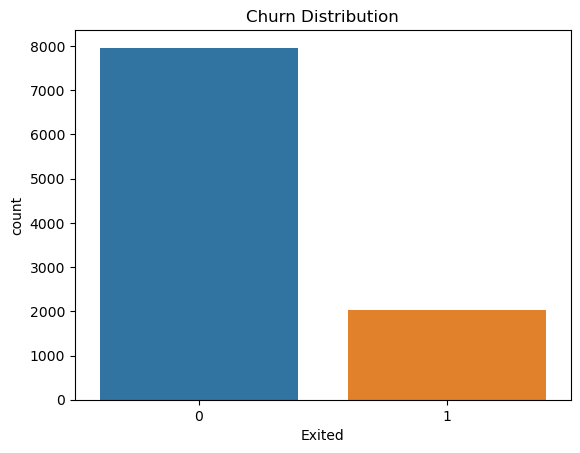

In [13]:
sns.countplot(x='Exited', data=df)
plt.title("Churn Distribution")
plt.show()


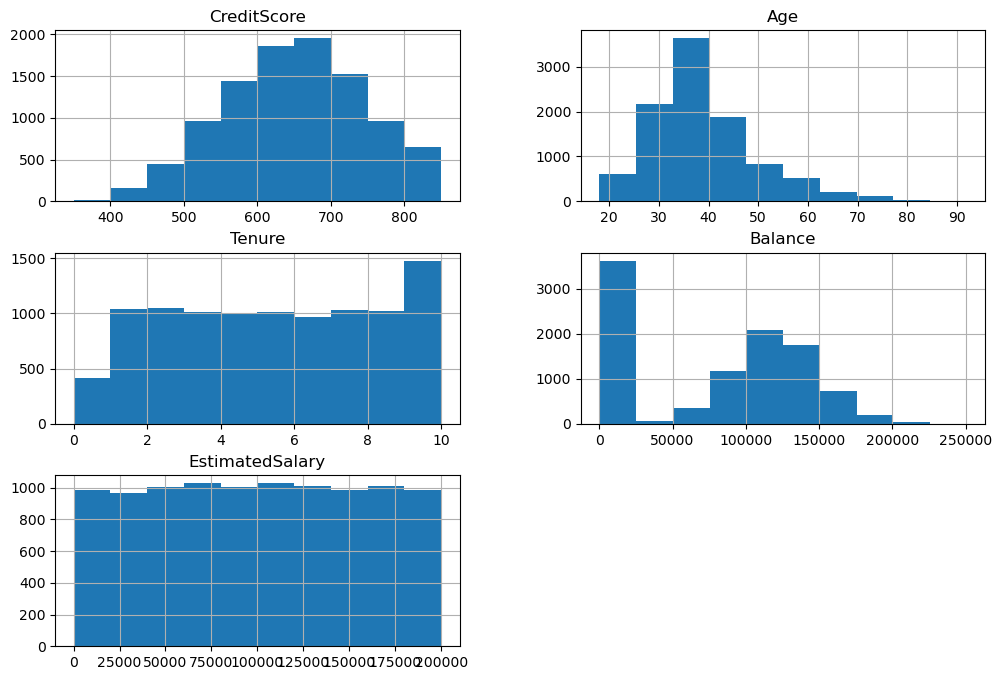

In [14]:
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

df[num_cols].hist(figsize=(12,8))
plt.show()


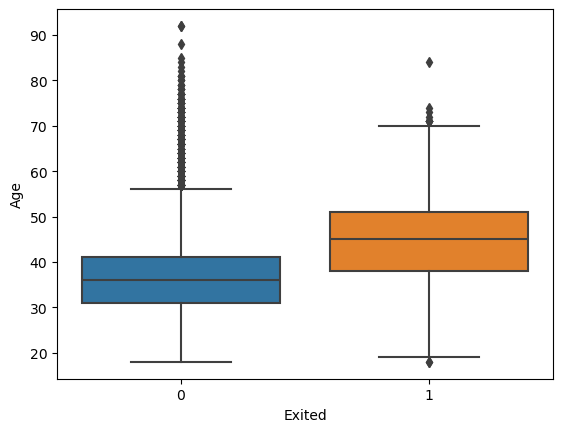

In [15]:
sns.boxplot(x='Exited', y='Age', data=df)
plt.show()


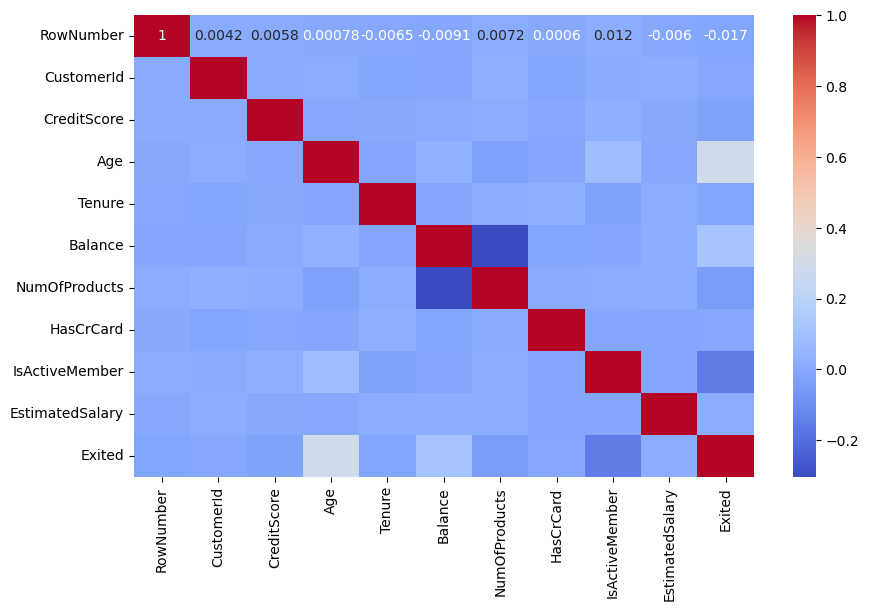

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm')
plt.show()


C:\Users\suyash\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


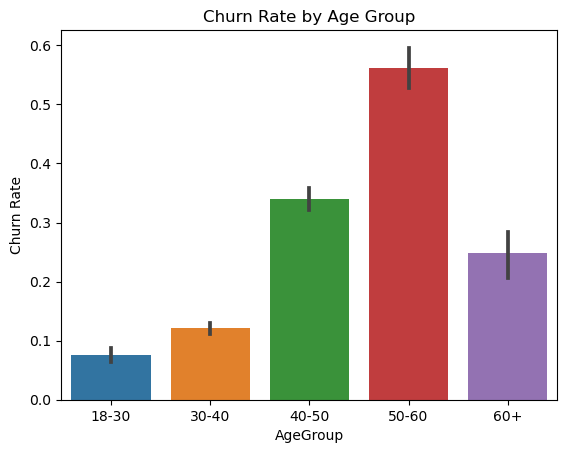

In [17]:
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[18,30,40,50,60,100],
    labels=['18-30','30-40','40-50','50-60','60+']
)

sns.barplot(x='AgeGroup', y='Exited', data=df)
plt.title("Churn Rate by Age Group")
plt.ylabel("Churn Rate")
plt.show()


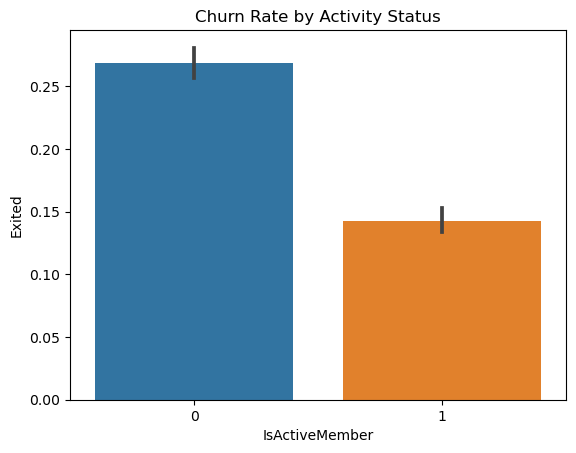

In [18]:
sns.barplot(x='IsActiveMember', y='Exited', data=df)
plt.title("Churn Rate by Activity Status")
plt.show()


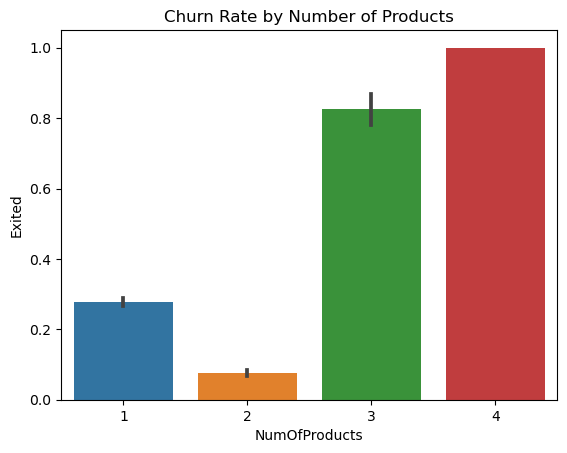

In [19]:
sns.barplot(x='NumOfProducts', y='Exited', data=df)
plt.title("Churn Rate by Number of Products")
plt.show()


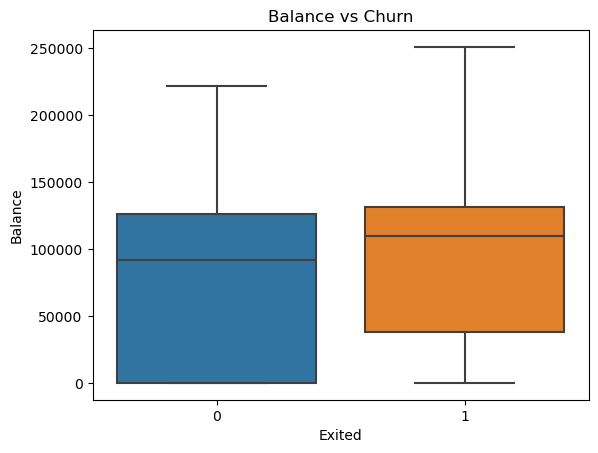

In [20]:
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title("Balance vs Churn")
plt.show()


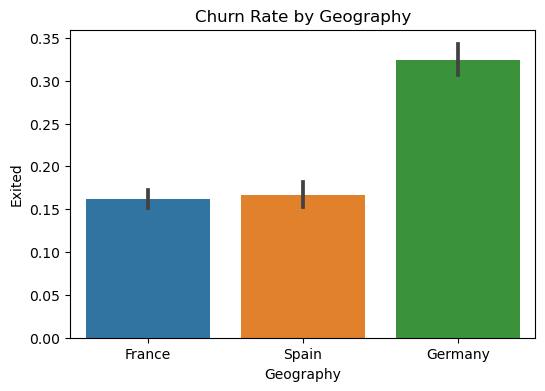

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(x='Geography', y='Exited', data=df)
plt.title("Churn Rate by Geography")
plt.show()


In [22]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[column] >= lower) & (df[column] <= upper)]


In [23]:
for col in ['Age','Balance','EstimatedSalary']:
    df = remove_outliers(df, col)


In [24]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [25]:
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain']
X = df[features]
y = df['Exited']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train[:5],X_test[:5]

(array([[-0.68521339,  0.91204659, -0.3135728 ,  0.34014689,  1.37030638,
          0.79391812,  0.64363606,  0.9958592 ,  0.82863446, -0.57535389,
         -0.57715063],
        [-2.4692736 , -1.09643522, -0.20000685,  1.72680626, -1.22699802,
         -0.90305986, -1.55367305, -1.00415802,  0.34965203, -0.57535389,
         -0.57715063],
        [-1.20083773,  0.91204659, -0.99496853,  0.68681173,  1.58305419,
         -0.90305986,  0.64363606,  0.9958592 , -0.37230522, -0.57535389,
         -0.57715063],
        [-0.02521424, -1.09643522, -0.08644089,  0.68681173,  0.99889769,
          0.79391812,  0.64363606, -1.00415802, -0.75422887,  1.73806072,
         -0.57715063],
        [-0.15927657,  0.91204659, -0.99496853,  0.68681173,  0.46698574,
         -0.90305986,  0.64363606,  0.9958592 ,  0.85673174, -0.57535389,
         -0.57715063]]),
 array([[ 0.54197253,  0.91204659, -0.65427066, -1.39317731,  0.79290358,
         -0.90305986,  0.64363606,  0.9958592 , -0.77108188, -0.57535

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = model.predict(X_test)

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Probabilities for ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)


In [32]:
print(conf_matrix)
print(class_report)
print(accuracy)
print("ROC-AUC Score:", roc_auc)

[[1485   51]
 [ 222  171]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1536
           1       0.77      0.44      0.56       393

    accuracy                           0.86      1929
   macro avg       0.82      0.70      0.74      1929
weighted avg       0.85      0.86      0.84      1929

0.8584758942457231
ROC-AUC Score: 0.8566308510920271


C:\Users\suyash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


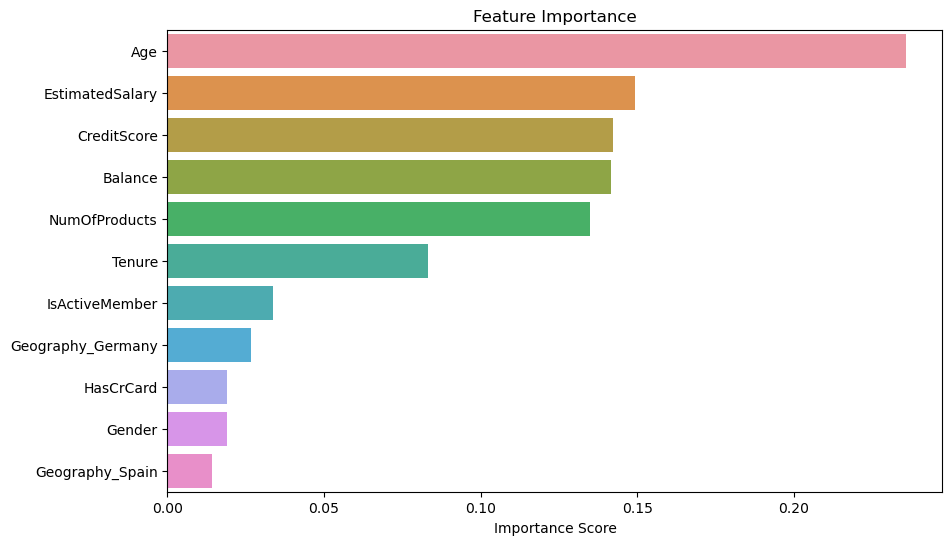

In [33]:
importances = model.feature_importances_
indices = np.argsort(importances) [::-1]
names = [features [i] for i in indices]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=names)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()


In [34]:
from sklearn.linear_model import LogisticRegression

# Build and train the Logistic Regression model
log_reg = LogisticRegression (random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

# Evaluate the model
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(conf_matrix_log_reg, class_report_log_reg, accuracy_log_reg)
print("ROC-AUC (Logistic Regression):", roc_auc_log_reg)

[[1476   60]
 [ 271  122]]               precision    recall  f1-score   support

           0       0.84      0.96      0.90      1536
           1       0.67      0.31      0.42       393

    accuracy                           0.83      1929
   macro avg       0.76      0.64      0.66      1929
weighted avg       0.81      0.83      0.80      1929
 0.8284085018144116
ROC-AUC (Logistic Regression): 0.7982002756573366


In [35]:
from sklearn.svm import SVC

#Build and train the SVM model
svm_model = SVC (kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report (y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(conf_matrix_svm, class_report_svm, accuracy_svm)

[[1536    0]
 [ 393    0]]               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1536
           1       0.00      0.00      0.00       393

    accuracy                           0.80      1929
   macro avg       0.40      0.50      0.44      1929
weighted avg       0.63      0.80      0.71      1929
 0.7962674961119751


C:\Users\suyash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suyash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suyash\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# ROC-AUC
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)


# Evaluate the model
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(conf_matrix_knn, class_report_knn, accuracy_knn)
print("ROC-AUC (KNN):", roc_auc_knn)

[[1458   78]
 [ 255  138]]               precision    recall  f1-score   support

           0       0.85      0.95      0.90      1536
           1       0.64      0.35      0.45       393

    accuracy                           0.83      1929
   macro avg       0.75      0.65      0.68      1929
weighted avg       0.81      0.83      0.81      1929
 0.8273716951788491
ROC-AUC (KNN): 0.7756034974024597


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Build and train the Gradient Boosting model
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

#Make predictions
y_pred_gbm = gbm_model.predict(X_test)

# ROC-AUC (ADD HERE)
y_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]
roc_auc_gbm = roc_auc_score(y_test, y_prob_gbm)


#Evaluate the model
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
class_report_gbm =  classification_report(y_test, y_pred_gbm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(conf_matrix_gbm, class_report_gbm, accuracy_gbm)
print("ROC-AUC (Gradient Boosting):", roc_auc_gbm)


[[1494   42]
 [ 224  169]]               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1536
           1       0.80      0.43      0.56       393

    accuracy                           0.86      1929
   macro avg       0.84      0.70      0.74      1929
weighted avg       0.86      0.86      0.85      1929
 0.8621047174701918
ROC-AUC (Gradient Boosting): 0.8764677427905003


In [38]:
print("\n--- Model Comparison ---")

print("Random Forest Accuracy:", accuracy)
print("Logistic Regression Accuracy:", accuracy_log_reg)
print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)
print("Gradient Boosting Accuracy:", accuracy_gbm)

print("\nROC-AUC Scores:")
print("Random Forest:", roc_auc)
print("Logistic Regression:", roc_auc_log_reg)
print("KNN:", roc_auc_knn)
print("Gradient Boosting:", roc_auc_gbm)




--- Model Comparison ---
Random Forest Accuracy: 0.8584758942457231
Logistic Regression Accuracy: 0.8284085018144116
SVM Accuracy: 0.7962674961119751
KNN Accuracy: 0.8273716951788491
Gradient Boosting Accuracy: 0.8621047174701918

ROC-AUC Scores:
Random Forest: 0.8566308510920271
Logistic Regression: 0.7982002756573366
KNN: 0.7756034974024597
Gradient Boosting: 0.8764677427905003


In [39]:
comparison_data = {
    "Model": [
        "Random Forest",
        "Logistic Regression",
        "SVM",
        "KNN",
        "Gradient Boosting"
    ],
    "Accuracy": [
        accuracy,
        accuracy_log_reg,
        accuracy_svm,
        accuracy_knn,
        accuracy_gbm
    ],
    "ROC_AUC": [
        roc_auc,
        roc_auc_log_reg,
        None,   # SVM not computed
        roc_auc_knn,
        roc_auc_gbm
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df


,Model,Accuracy,ROC_AUC
0,Random Forest,0.858476,0.856631
1,Logistic Regression,0.828409,0.798200
2,SVM,0.796267,NaN
3,KNN,0.827372,0.775603
4,Gradient Boosting,0.862105,0.876468


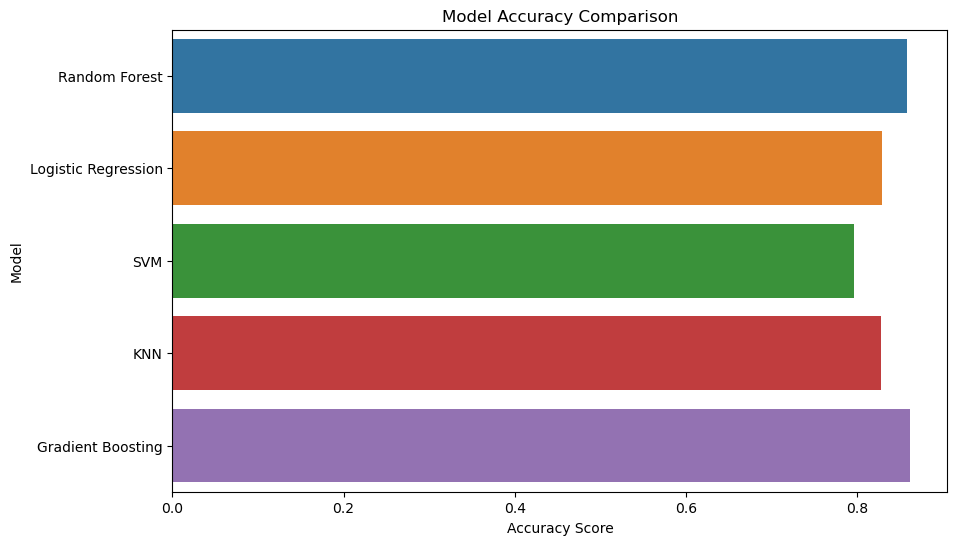

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy", y="Model", data=comparison_df)

plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")

plt.show()


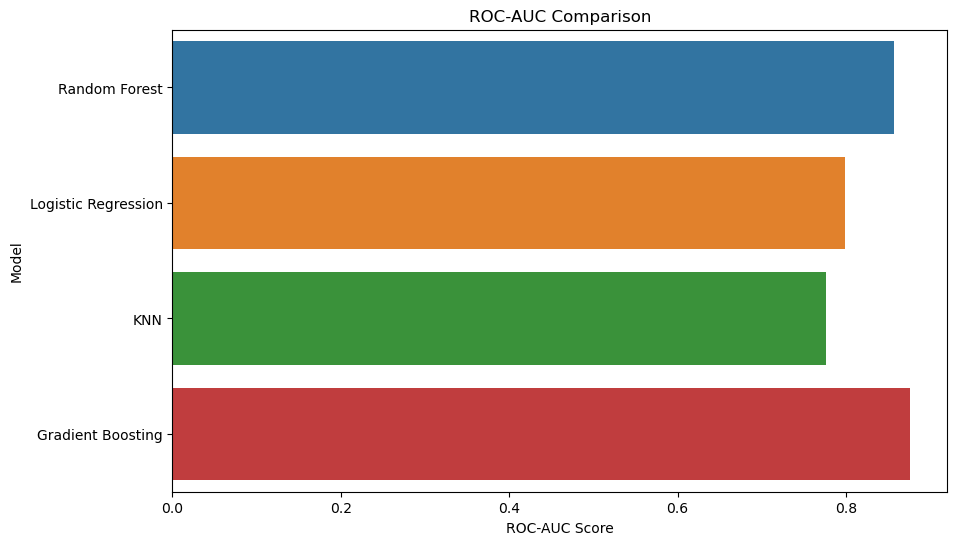

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="ROC_AUC",
    y="Model",
    data=comparison_df.dropna()
)

plt.title("ROC-AUC Comparison")
plt.xlabel("ROC-AUC Score")
plt.ylabel("Model")

plt.show()
